**Penerapan Metode Support Vector Machine (SVM) Pada Klasifikasi Buah Segar dan Busuk**

In [85]:
# Import library
import os
import cv2
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from google.colab import files

In [86]:
# Fungsi untuk mengekstrak fitur dari gambar
def extract_features(image_path):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (100, 100))  # Ubah ukuran gambar menjadi 100x100 pixel
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)  # Ubah menjadi citra keabuan
    flattened_image = gray_image.flatten()  # Flattening menjadi array 1 dimensi
    return flattened_image

In [87]:
# Path folder dataset pisang matang
dir_pisang_matang = "fresh_banana"
# Path folder dataset pisang busuk
dir_pisang_busuk = "stale_banana"

# Membaca gambar dari folder dan mengekstrak fiturnya
X = []
y = []

for file_name in os.listdir(dir_pisang_matang):
    image_path = os.path.join(dir_pisang_matang, file_name)
    X.append(extract_features(image_path))
    y.append(0)  # Label 0 untuk pisang matang

for file_name in os.listdir(dir_pisang_busuk):
    image_path = os.path.join(dir_pisang_busuk, file_name)
    X.append(extract_features(image_path))
    y.append(1)  # Label 1 untuk pisang busuk

X = np.array(X)
y = np.array(y)

In [88]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# Melatih model klasifikasi (SVM)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Simpan model ke file
joblib.dump(model, 'model.pkl')

['model.pkl']

In [90]:
# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menampilkan hasil evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9229508196721311

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       324
           1       0.93      0.90      0.92       286

    accuracy                           0.92       610
   macro avg       0.92      0.92      0.92       610
weighted avg       0.92      0.92      0.92       610



**#RUN AFTER SETELAH PELATIHAN MODEL, UNTUK MENGKLASIFIKASIKAN GAMBAR YANG DI INPUT**

In [91]:
# Fungsi untuk mengekstrak fitur dari gambar
def extract_features_for_input(image):
    resized_image = cv2.resize(image, (100, 100))  # Ubah ukuran gambar menjadi 100x100 pixel
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)  # Ubah menjadi citra keabuan
    flattened_image = gray_image.flatten()  # Flattening menjadi array 1 dimensi
    return flattened_image

In [92]:
# Memuat model yang telah dilatih sebelumnya
model = joblib.load('model.pkl')

In [93]:
# Fungsi untuk melakukan prediksi pada gambar yang diunggah
def predict_image(image):
    features = extract_features_for_input(image)
    features = np.array([features])
    prediction = model.predict(features)
    return prediction

In [94]:
# Mengunggah gambar dari perangkat pengguna
uploaded = files.upload()

# Mendapatkan nama file gambar yang diunggah
file_names = list(uploaded.keys())

Saving pisang hijau.jpg to pisang hijau.jpg


Gambar pisang hijau.jpg adalah pisang busuk.


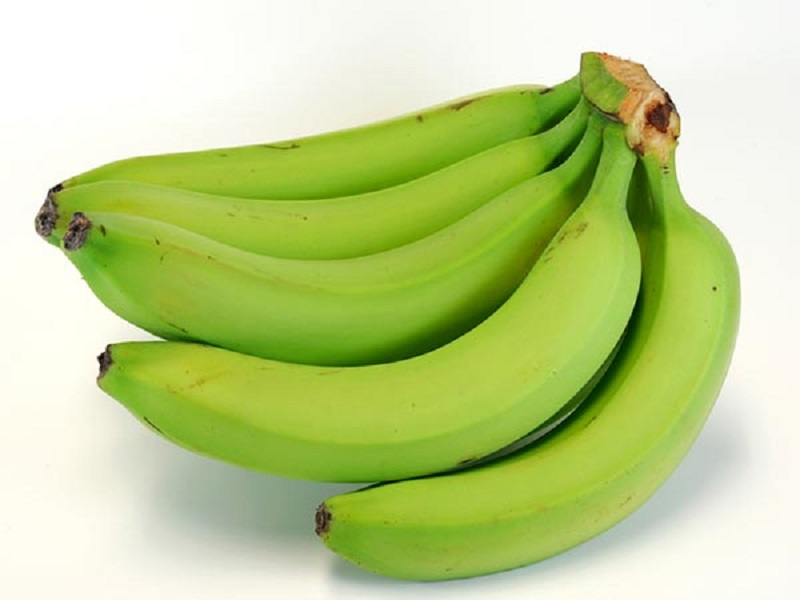

In [95]:
from google.colab.patches import cv2_imshow

# Membaca gambar yang diunggah, melakukan prediksi, dan menampilkan hasilnya
for file_name in file_names:
    image = cv2.imread(file_name)
    prediction = predict_image(image)
    if prediction[0] == 0:
        print(f"Gambar {file_name} adalah pisang matang.")
    else:
        print(f"Gambar {file_name} adalah pisang busuk.")
    cv2_imshow(image)
